## HW_3 Прогнозирование биологического ответа

In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn import model_selection #методы разделения и валидации
from sklearn.model_selection import train_test_split #сплитование выборки

#### 1. Знакомство с данными

In [2]:

data = pd.read_csv('data/_train_sem09.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


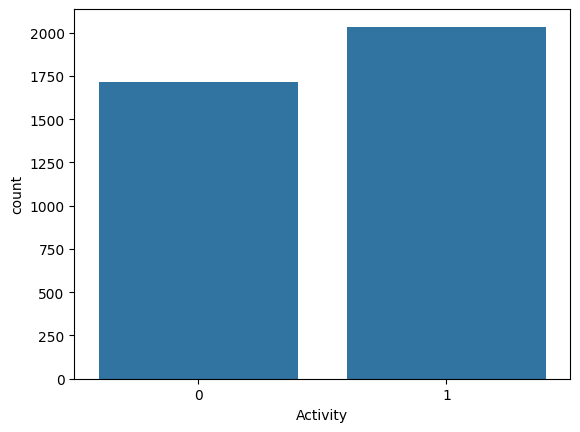

In [3]:
# Проверяем сбалансированность классов
sns.countplot(data=data, x='Activity');

Данные в выборке сбалансированы, стратифицированное разбиение не требуется.

#### 2. Подготовка данных

In [3]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### 3. Оптимизация гиперпараметров модели.
#### 3.1. Логистичекая регрессия

In [21]:
# Обучаем модель логистической регрессии, делаем предсказание на тестовой выборке, фиксируем значение F1
log_reg = linear_model.LogisticRegression(random_state=5, max_iter=50)
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
print('F1 score на тестовой выборке:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))


F1 score на тестовой выборке:0.79


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Обучаем модель логистической регрессии с кросс-валидацией, фиксируем значение F1
log_reg_cross = linear_model.LogisticRegression(random_state=5, max_iter=50)
kf = model_selection.KFold(n_splits = 10)
cv_metrics = model_selection.cross_validate(
    estimator=log_reg_cross,
    X=X,
    y=y,
    cv=kf,
    scoring='f1'
    )
print('Среднее значение F1 на тестовой выборке:{:.2f}'.format(np.mean(cv_metrics['test_score'])))
        

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

Среднее значение F1 на тестовой выборке:0.78


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Значение f1 на тестовой выборке при использовании кросс-валидации незначительно снизилось.

#### 3.1.1 GridSearchCV

In [5]:
from sklearn.model_selection import GridSearchCV

In [33]:
# создаем список гиперпараметров
param_grid = [{'penalty':['l2', 'none'],
              'solver': ['lbfgs', 'sag'],
              'C': list(np.linspace(0.1, 1, 10, dtype=float))},
              {'penalty':['l2', 'l1'],
              'solver': ['liblinear', 'saga'],
              'C': list(np.linspace(0.1, 1, 10, dtype=float))}
]
# Обучаем модель логистической регрессии с GridSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=5,
        max_iter=50    
    ),
    param_grid=param_grid,
    cv=10,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
y_test_pred_grid = grid_search.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_grid)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCa

F1 на тестовом наборе:0.79
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Значение метрики f1 не изменилось.

### 3.1.2 RandomizedSearchCV

In [6]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# создаем список гиперпараметров
param_random = {'penalty':['l2', 'l1'],
              'solver': ['liblinear', 'saga'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))
               }
# Обучаем модель логистической регрессии с RandomizedSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=5,
        max_iter=50
    ),
    param_distributions=param_random,
    cv=10,
    n_iter=5,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
y_test_pred_random = random_search.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_random)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

F1 на тестовом наборе:0.80
Наилучшие значения гиперпараметров: {'solver': 'saga', 'penalty': 'l1', 'C': 0.45}


C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Значение метрики f1 выросло.

### 3.1.3 Hyperopt

In [7]:
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, space_eval

In [41]:
# задаем пространство поиска гиперпараметров
space = {'penalty':hp.choice('penalty', ['l2', 'l1']),
         'solver':hp.choice('solver', ['liblinear', 'saga']),
         'C':hp.uniform('C', 0.1, 1)
         }

In [73]:
# зафксируем random_state
random_state = 5

def hyperopt_lr(params, cv=10, X=X_train, y=y_train, random_state=random_state):
   """ Функция, обучающая модель LogisticRegression
    по переданным гиперпараметрам
    
  Args:
      params: комбинация гиперпараметров, 
      cv: количество фолдов кросс-валидации, 
      X: матрица наблюдений, 
      y: вектор меток объектов, 
      random_state: случайное число для воспроизводимости

  Returns:
      -score: минимизированная метрика f1
      """
    
   params = {'penalty': str(params['penalty']), 
              'solver': str(params['solver']), 
             'C': float(params['C'])
              }
   model = linear_model.LogisticRegression(**params, random_state=random_state)
   model.fit(X, y)
   score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
   return -score

In [74]:
# подбор гиперпараметров
best = fmin(hyperopt_lr,
            space=space,
            max_evals=50,
            rstate=np.random.default_rng(random_state))
print('Наилучшие значения гиперпараметров {}'.format(space_eval(space, best)))

TPE is being used as the default algorithm.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 3/50 [00:30<06:07,  7.81s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 8/50 [01:02<03:42,  5.29s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 10/50 [01:23<04:54,  7.35s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 11/50 [01:46<07:50, 12.07s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 12/50 [02:12<10:24, 16.43s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 16/50 [02:42<04:44,  8.38s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 20/50 [03:10<03:06,  6.22s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 21/50 [03:28<04:43,  9.78s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▍     | 22/50 [03:51<06:23, 13.70s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 23/50 [04:17<07:44, 17.22s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 24/50 [04:35<07:33, 17.45s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 25/50 [04:53<07:20, 17.61s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 26/50 [05:16<07:43, 19.32s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 54%|█████▍    | 27/50 [05:41<08:02, 20.98s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 28/50 [05:59<07:21, 20.06s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 29/50 [06:22<07:20, 20.99s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 30/50 [06:40<06:41, 20.09s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 62%|██████▏   | 31/50 [07:05<06:49, 21.54s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 32/50 [07:23<06:09, 20.54s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 33/50 [07:46<06:01, 21.27s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 34/50 [08:04<05:25, 20.32s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 35/50 [08:22<04:53, 19.60s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 36/50 [08:47<04:56, 21.16s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 37/50 [09:05<04:22, 20.18s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 38/50 [09:23<03:54, 19.52s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 39/50 [09:45<03:45, 20.46s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 40/50 [10:03<03:16, 19.66s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 82%|████████▏ | 41/50 [10:21<02:52, 19.21s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▍ | 42/50 [10:48<02:52, 21.61s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 44/50 [11:11<01:33, 15.64s/trial, best loss: -0.7875640708986744]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▏| 46/50 [11:30<00:47, 11.95s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 47/50 [11:54<00:46, 15.60s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 49/50 [12:16<00:12, 12.38s/trial, best loss: -0.7879700695936037]

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 50/50 [12:34<00:00, 15.08s/trial, best loss: -0.7879700695936037]
Наилучшие значения гиперпараметров {'C': 0.10059073210640976, 'penalty': 'l2', 'solver': 'saga'}


In [75]:
# обучаем модель с подобранными гиперпараметрами, делаем предсказание
model_ho = linear_model.LogisticRegression(
    penalty=space_eval(space, best)['penalty'],
    solver=space_eval(space, best)['solver'],
    C = float(best['C']),
    random_state=random_state,
    max_iter=50
)
model_ho.fit(X_train, y_train)
y_test_pred_ho = cross_val_score(model_ho, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score на тестовом наборе: {:.2f}'.format(y_test_pred_ho))

C:\Users\Настенька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


f1_score на тестовом наборе: 0.79


Значение метрики f1 не изменилось.

### 3.1.4 Optuna

In [8]:
import optuna

In [65]:
def optuna_lr(trial):
  
  """Функция, обучающая модель LogisticRegression
    по переданным гиперпараметрам

  Args:
      trial : класс, от которого вызываются гиперпараметры

  Returns:
      score(float): метрика F1
      """
      
  penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
  solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
  C = trial.suggest_float('C', 0.1, 1)

  # создаем модель
  model = linear_model.LogisticRegression(penalty=penalty,
                                          solver=solver,
                                          C=C,
                                          random_state=random_state,
                                          max_iter=50)
  # обучаем модель
  score = cross_val_score(model, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
  
  return score

In [66]:
# создаем объект исследования и ищем лучшую комбинацию гиперпараметров
study = optuna.create_study(study_name = 'LogisticRegression', direction = 'maximize')
study.optimize(optuna_lr, n_trials = 50)
print("Наилучшие значения гиперпараметров {}".format(study.best_params))

[I 2024-05-14 19:09:09,229] A new study created in memory with name: LogisticRegression
[I 2024-05-14 19:09:27,989] Trial 0 finished with value: 0.7851069024425358 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.2767756794107626}. Best is trial 0 with value: 0.7851069024425358.
[I 2024-05-14 19:09:30,332] Trial 1 finished with value: 0.7870176393091557 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.2410888121099819}. Best is trial 1 with value: 0.7870176393091557.
[I 2024-05-14 19:09:44,051] Trial 2 finished with value: 0.7861734177931579 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.7920799794812781}. Best is trial 1 with value: 0.7870176393091557.
[I 2024-05-14 19:09:56,040] Trial 3 finished with value: 0.7857458957549421 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.27196093941814536}. Best is trial 1 with value: 0.7870176393091557.
[I 2024-05-14 19:10:10,038] Trial 4 finished with value: 0.7858965446987372 and parameters: {'pena

Наилучшие значения гиперпараметров {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.3580874991797323}


In [70]:
# Обучаем модель и делаем предсказание
model_opt = linear_model.LogisticRegression(**study.best_params, random_state = random_state)
model_opt.fit(X_train, y_train)
y_test_pred_opt = cross_val_score(model_opt, X, y, cv=10, scoring="f1", n_jobs=-1).mean()
print('f1_score на тестовом наборе: {:.2f}'.format(y_test_pred_opt ))

f1_score на тестовом наборе: 0.79


Значение метрики f1 не изменилось.

Все представленные модели показали одинаковое значение метрики F1 - 0.79. 

Подбор гиперпараметров с помощью RandomizedSearchCV позволил незначительно повысить F1 до 0.8. Значения гиперпараметров для такого F1: 'solver': 'saga', 'penalty': 'l1', 'C': 0.45.

### 3.2 Случайный лес

In [8]:
# Обучаем модель случайный лес, делаем предсказание на тестовой выборке, фиксируем значение F1
model_rf = ensemble.RandomForestClassifier(random_state=5)
model_rf.fit(X_train, y_train)
y_test_pred_rf = model_rf.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_rf)))

f1_score на тестовом наборе: 0.83


По сравнению с логистической регрессией метрика F1 улучшилась при использовании случайного леса, даже без подбора гиперпараметров.

In [9]:
# Обучаем модель случайный лес с кросс-валидацией, делаем предсказание на тестовой выборке, фиксируем значение F1
model_rf_cross = ensemble.RandomForestClassifier(random_state=5)
kf = model_selection.KFold(n_splits=10)
cv_rf_metrics = model_selection.cross_validate(
    estimator=model_rf_cross,
    X=X,
    y=y,
    cv=kf,
    scoring='f1'
)
print('Среднее значение F1 на тестовой выборке:{:.2f}'.format(np.mean(cv_rf_metrics['test_score'])))

Среднее значение F1 на тестовой выборке:0.81


Использование кросс-валидации не помогло уведичить значение метрики f1.

#### 3.2.1 GridSearchCV

In [9]:
# создаем список гиперпараметров
param_grid_rf = {'n_estimators':list(range(60, 200, 20)),
               'criterion':['entropy','gini'],
               'max_depth': list(np.linspace(5, 30, 5, dtype=int)),
               'min_samples_leaf': list(range(2, 10, 2))
               }


# Обучаем модель слуйчайного леса с GridSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
grid_search_rf = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=5),
    param_grid=param_grid_rf,
    cv=10,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
y_test_pred_grid_rf = grid_search_rf.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_grid_rf)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_rf.best_params_))

F1 на тестовом наборе:0.84
Наилучшие значения гиперпараметров: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 180}


### 3.2.2 RandomizedSearchCV

In [ ]:
# создаем список гиперпараметров
param_random_rf = {'n_estimators':list(range(60, 200, 20)),
               'criterion':['entropy','gini'],
               'max_depth': list(np.linspace(5, 30, 5, dtype=int)),
               'min_samples_leaf': list(range(2, 10, 2))
               }
# Обучаем модель логистической регрессии с RandomizedSearch, делаем предсказание, фиксируем значение F1 и наилучшие значения гиперпараметров
random_search_rf = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=5),
    param_distributions=param_random_rf,
    cv=10,
    n_iter=5,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
y_test_pred_random = random_search.predict(X_test)
print('F1 на тестовом наборе:{:.2f}'.format(metrics.f1_score(y_test, y_test_pred_random)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))